In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns

In [2]:
df=pd.read_csv("employee_promotion.csv")

In [3]:
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.0,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,NaN,0


In [4]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


# Data preprocessing

In [5]:
df.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
Le=LabelEncoder()

In [9]:
df['department']=Le.fit_transform(df['department'])
df['region']=Le.fit_transform(df['region'])
df['education']=Le.fit_transform(df['education'])
df['gender']=Le.fit_transform(df['gender'])
df['recruitment_channel']=Le.fit_transform(df['recruitment_channel'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  int32  
 2   region                54808 non-null  int32  
 3   education             54808 non-null  int32  
 4   gender                54808 non-null  int32  
 5   recruitment_channel   54808 non-null  int32  
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int32(5), int64(6)
memory usage: 4.4 MB


In [11]:
df.dropna(inplace=True)

In [12]:
df.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
is_promoted             0
dtype: int64

# Data visualization

C:\Users\Varshita\OneDrive\Documents\Python Scripts\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='recruitment_channel', ylabel='count'>

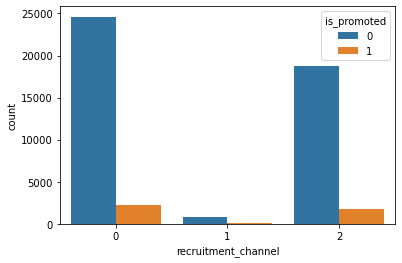

In [13]:
sns.countplot(df['recruitment_channel'],hue=df['is_promoted'])

C:\Users\Varshita\OneDrive\Documents\Python Scripts\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='previous_year_rating', ylabel='count'>

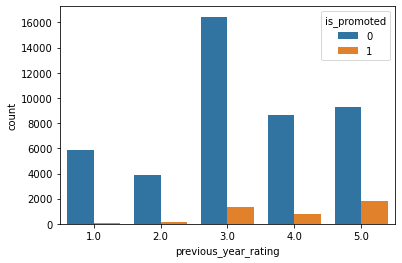

In [14]:
sns.countplot(df['previous_year_rating'],hue=df['is_promoted'])

C:\Users\Varshita\OneDrive\Documents\Python Scripts\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_training_score', ylabel='count'>

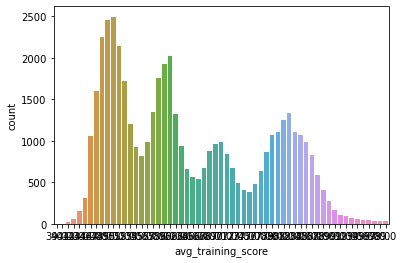

In [15]:
sns.countplot(df['avg_training_score'])

C:\Users\Varshita\OneDrive\Documents\Python Scripts\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='previous_year_rating', ylabel='count'>

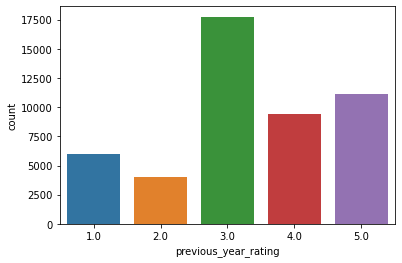

In [16]:
sns.countplot(df['previous_year_rating'])

# Naive bayes

In [17]:
from sklearn.naive_bayes import GaussianNB

In [18]:
X=df.drop(['is_promoted'],axis=1)
Y=df['is_promoted']

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30)

In [20]:
model= GaussianNB()
model.fit(X_train,Y_train)

GaussianNB()

In [21]:
Y_pred=model.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
from sklearn import metrics
print("accuracy",metrics.accuracy_score(Y_test,Y_pred))

accuracy 0.9161263622568631


# Decision tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
model=DecisionTreeClassifier()
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)
d=pd.DataFrame(Y_pred)
d.value_counts()

0    13097
1     1401
dtype: int64

In [24]:
print("Accuracy : ",accuracy_score(Y_test,Y_pred))
print("Confusion Matrix : \n",confusion_matrix(Y_test,Y_pred))

Accuracy :  0.886329148848117
Confusion Matrix : 
 [[12352   903]
 [  745   498]]


[Text(269.0651307910873, 215.024, 'X[11] <= 89.5\nentropy = 0.424\nsamples = 48326\nvalue = [44158, 4168]'),
 Text(204.25826092025173, 210.192, 'X[8] <= 4.5\nentropy = 0.388\nsamples = 47623\nvalue = [43998, 3625]'),
 Text(127.41183379234985, 205.35999999999999, 'X[10] <= 0.5\nentropy = 0.308\nsamples = 36774\nvalue = [34747, 2027]'),
 Text(57.138924260812544, 200.528, 'X[8] <= 1.5\nentropy = 0.289\nsamples = 36068\nvalue = [34243, 1825]'),
 Text(5.814387643761377, 195.696, 'X[11] <= 55.5\nentropy = 0.089\nsamples = 5852\nvalue = [5786, 66]'),
 Text(1.8005957305973854, 190.864, 'X[7] <= 42.5\nentropy = 0.031\nsamples = 3115\nvalue = [3105, 10]'),
 Text(1.6897898394837, 186.032, 'X[9] <= 9.5\nentropy = 0.037\nsamples = 2566\nvalue = [2556, 10]'),
 Text(0.8310441833526394, 181.2, 'X[0] <= 4504.0\nentropy = 0.026\nsamples = 2322\nvalue = [2316, 6]'),
 Text(0.5540294555684263, 176.368, 'X[0] <= 4450.0\nentropy = 0.113\nsamples = 132\nvalue = [130, 2]'),
 Text(0.44322356445474104, 171.536, 

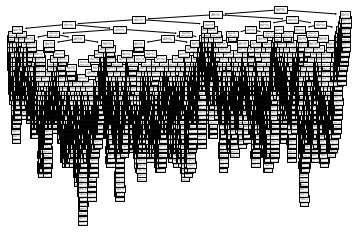

In [25]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(X,Y)
tree.plot_tree(clf)